<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:gold;border:20px;color:white'>Video games sales regression techniques<h2>

![](http://31.media.tumblr.com/7c317006a54a2ed72bc9eed4eed80b12/tumblr_mldfnfG11y1snwhhso1_500.gif)

This notebook will use regression models and techniques 
    
<h2 style='text-align:center;font-family:Comic Sans MS;font-size:30px;background-color:gold;border:20px;color:white'>Table of Contents<h2>
    
## 1. Introduction
## 2. Setup
## 3. Visualizations of the data and analysis
## 4. Statistical Models For Regression
## 5. Conclusion
    
# Introduction
    
## Data columns 📋

The Data set is named `Video_Games_Sales_as_at_22_Dec_2016.csv` and it has 16719 rows and 16 Columns webscaped from [Metacritic](https://www.metacritic.com/browse/games/release-date/available).

* `Name` - Name of the game.
* `Platform` - Game console.
* `Year_of_Release` - Year of the Game's release date. 
* `Genre` - Game type (action, sports, exc.)
* `Publisher` - Game studio.
* `NA_Sales` - Sales in north america.
* `EU_Sales` - Sales in europe.
* `JP_Sales` - Sales in japan.
* `Other_Sales` - Sales in other regions.
* `Global_Sales` - Sales around the globe.    
* `Critic_score` - Aggregate score compiled by Metacritic staff.
* `Critic_Count` - The number of critics used in coming up with the Criticscore.
* `User_Score` - Score by Metacritic's subscribers.
* `User_Count` - Number of users who gave the userscore.
* `Developer` - Party responsible for creating the game.
* `Rating` - The [ESRB](https://www.esrb.org/) ratings.
    
## Aim of this notebook

regression models for predicting global sales, improving models
and comparison between them.
    
# Setup

# DATA LOADING

In [1]:
#importing familiar and useful libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from plotly import express as px
import plotly.graph_objs as go
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore warningS

In [2]:
#loading the dataset
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#size of the dataset
print(data.shape)

(16719, 16)


In [4]:
#names of the columns
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [5]:
#dataset characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
#summary statistics
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


# FEATURE ENGINEERING

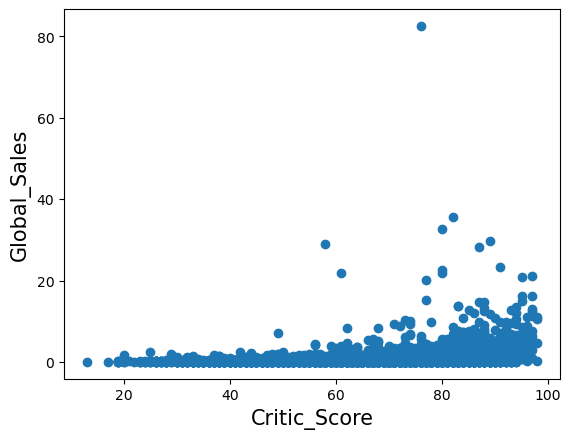

In [7]:
#checking for outliers
fig1, fig2 = plt.subplots()
fig2.scatter(x = data['Critic_Score'], y = data['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=15)
plt.xlabel('Critic_Score', fontsize=15)
plt.show()

In [8]:
#outlier elimination
data = data.drop(data[(data['Critic_Score']>60) & (data['Global_Sales']>60)].index)

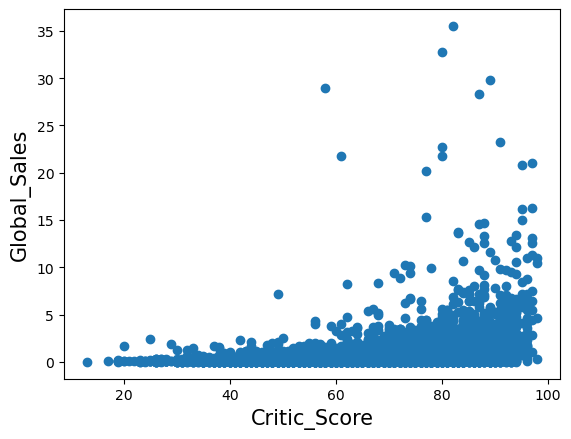

In [9]:
#re-checking for outliers
fig1, fig2 = plt.subplots()
fig2.scatter(x = data['Critic_Score'], y = data['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=15)
plt.xlabel('Critic_Score', fontsize=15)
plt.show()

# CORRELATION CHECK

<AxesSubplot:title={'center':'Correlation of Video Game Features- Numerical Values'}>

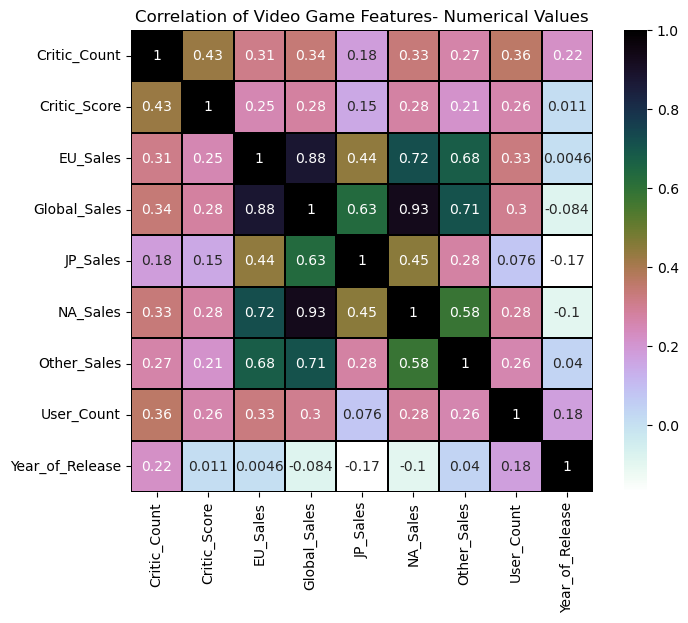

In [10]:
#segregating columns with values=string type
str_list = []
for colname, colvalue in data.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
            
#segregating columns with values=number type            
num_list = data.columns.difference(str_list)

#create dataframe containing only numerical features
data_num = data[num_list]
f, ax = plt.subplots(figsize=(8, 6))
plt.title('Correlation of Video Game Features- Numerical Values')

#draw the heatmap using seaborn library
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

Higher correlations between sales figures points out to the reverse causality between the sales numbers in different continents. Hence, Global_Sales can be chosen as the dependent variable.

# DATA CLEANING

In [11]:
#checking for missing values 
data_na = (data.isnull().sum() / len(data)) * 100

#dropping the missing values and calculating the missing values ratio
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,54.605814
Critic_Score,51.333892
Critic_Count,51.333892
Rating,40.489293
User_Score,40.100490
Developer,39.615983
Year_of_Release,1.609044
Publisher,0.323005
Name,0.011963
Genre,0.011963


Early case of worrying sign since Critic_Score(one of the most important independent variable) is missing about 50% of the values. It is beyond the point of repair.

In [12]:
#dropping the missing values in column Critic_Score
data = data.dropna(subset=['Critic_Score'])

#view the shape of the data again
print(data.shape)

#view the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(8136, 16)


,Missing Ratio
User_Count,13.765978
Year_of_Release,1.892822
Rating,1.020157
User_Score,0.467060
Developer,0.073746
Publisher,0.049164


Dealing with other missing/ NA values using summary statistics.

In [13]:
#dealing with the missing values using mode and median
data['Publisher'] = data['Publisher'].fillna(data['Publisher'].mode()[0])
data['Developer'] = data['Developer'].fillna(data['Developer'].mode()[0])
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])

data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].median())
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].median())

#There are "tbd" values in this column which we need to handle first
data['User_Score'] = data['User_Score'].replace('tbd', None)

#Now we can handle the N/A's appropriately
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].median())

In [14]:
#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


Now, our dataset is foolproof. WE CAN FINALLY GET GOING!

# Visualizations of the data and analysis 📊

## Univariate plots

# Distribution of Global Sales

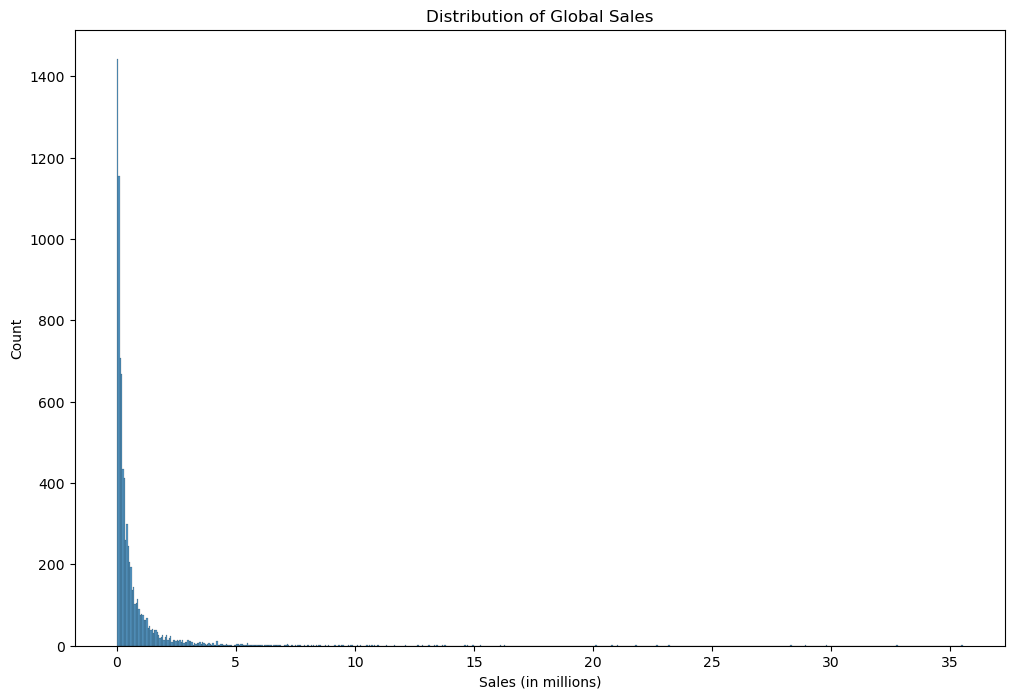

In [106]:
#Create histogram
plt.figure(figsize=(12, 8))
sns.histplot(data['Global_Sales'], kde=False)
plt.title('Distribution of Global Sales')
plt.xlabel('Sales (in millions)')
plt.ylabel('Count')
plt.show()

# Sales by Platform

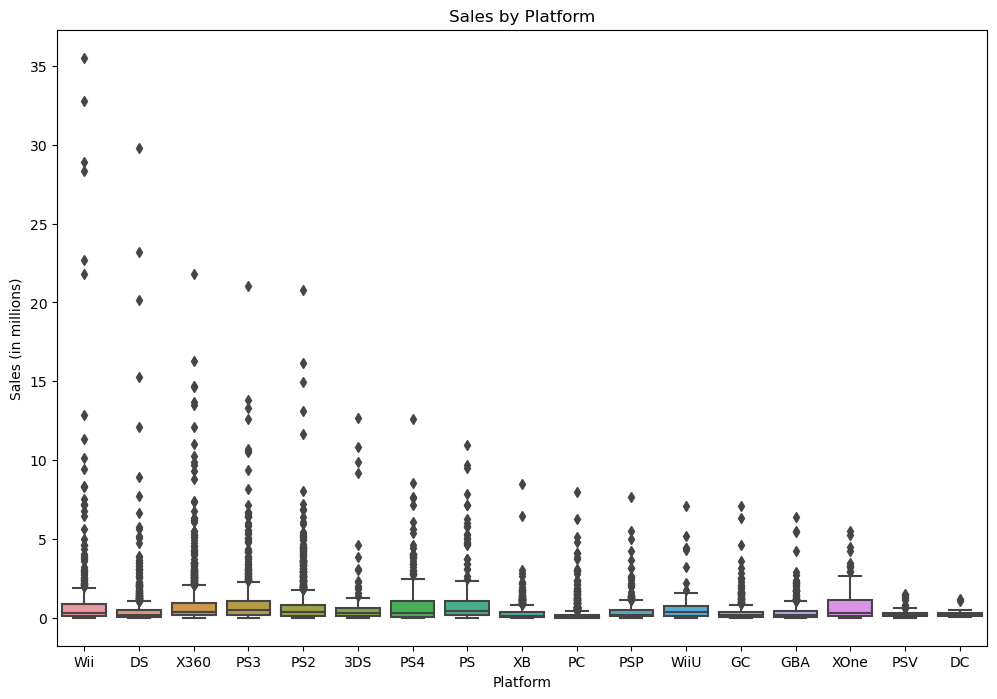

In [107]:
# Create boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Platform', y='Global_Sales', data=data)
plt.title('Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.show()

# GLOBAL SALES BY GENRE

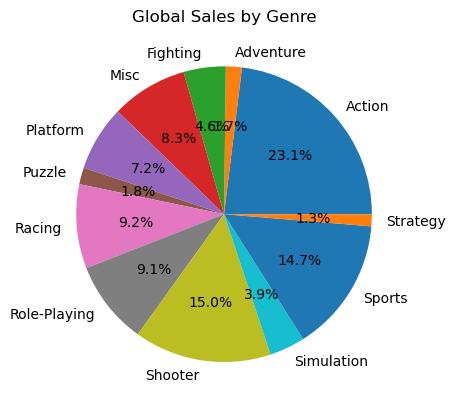

In [15]:
# Group by genre and calculate total sales for each genre
sales_by_genre = data.groupby("Genre").sum()["Global_Sales"]

# Create a pie chart
plt.pie(sales_by_genre.values, labels=sales_by_genre.index, autopct="%1.1f%%")

# Add a title
plt.title("Global Sales by Genre")

# Display the chart
plt.show()

# Sales by Year of Release

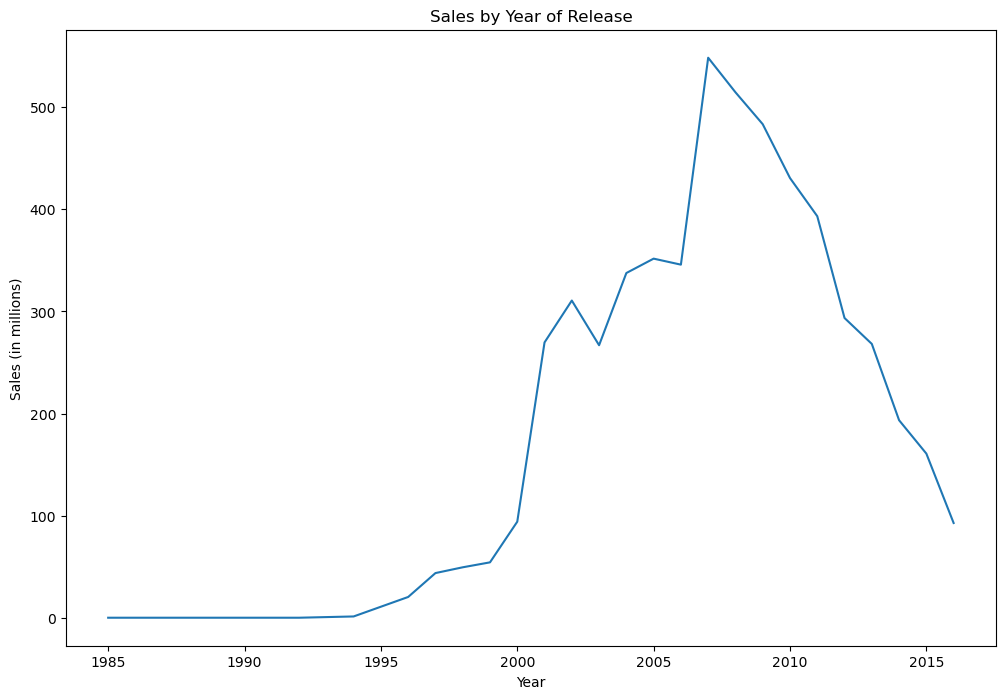

In [109]:
#Group by year of release
grouped2 = data.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()

# Create line chart
plt.figure(figsize=(12, 8))
plt.plot(grouped2['Year_of_Release'], grouped2['Global_Sales'])
plt.title('Sales by Year of Release')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.show()

## Multivariate plots

# Scatter plot matrix

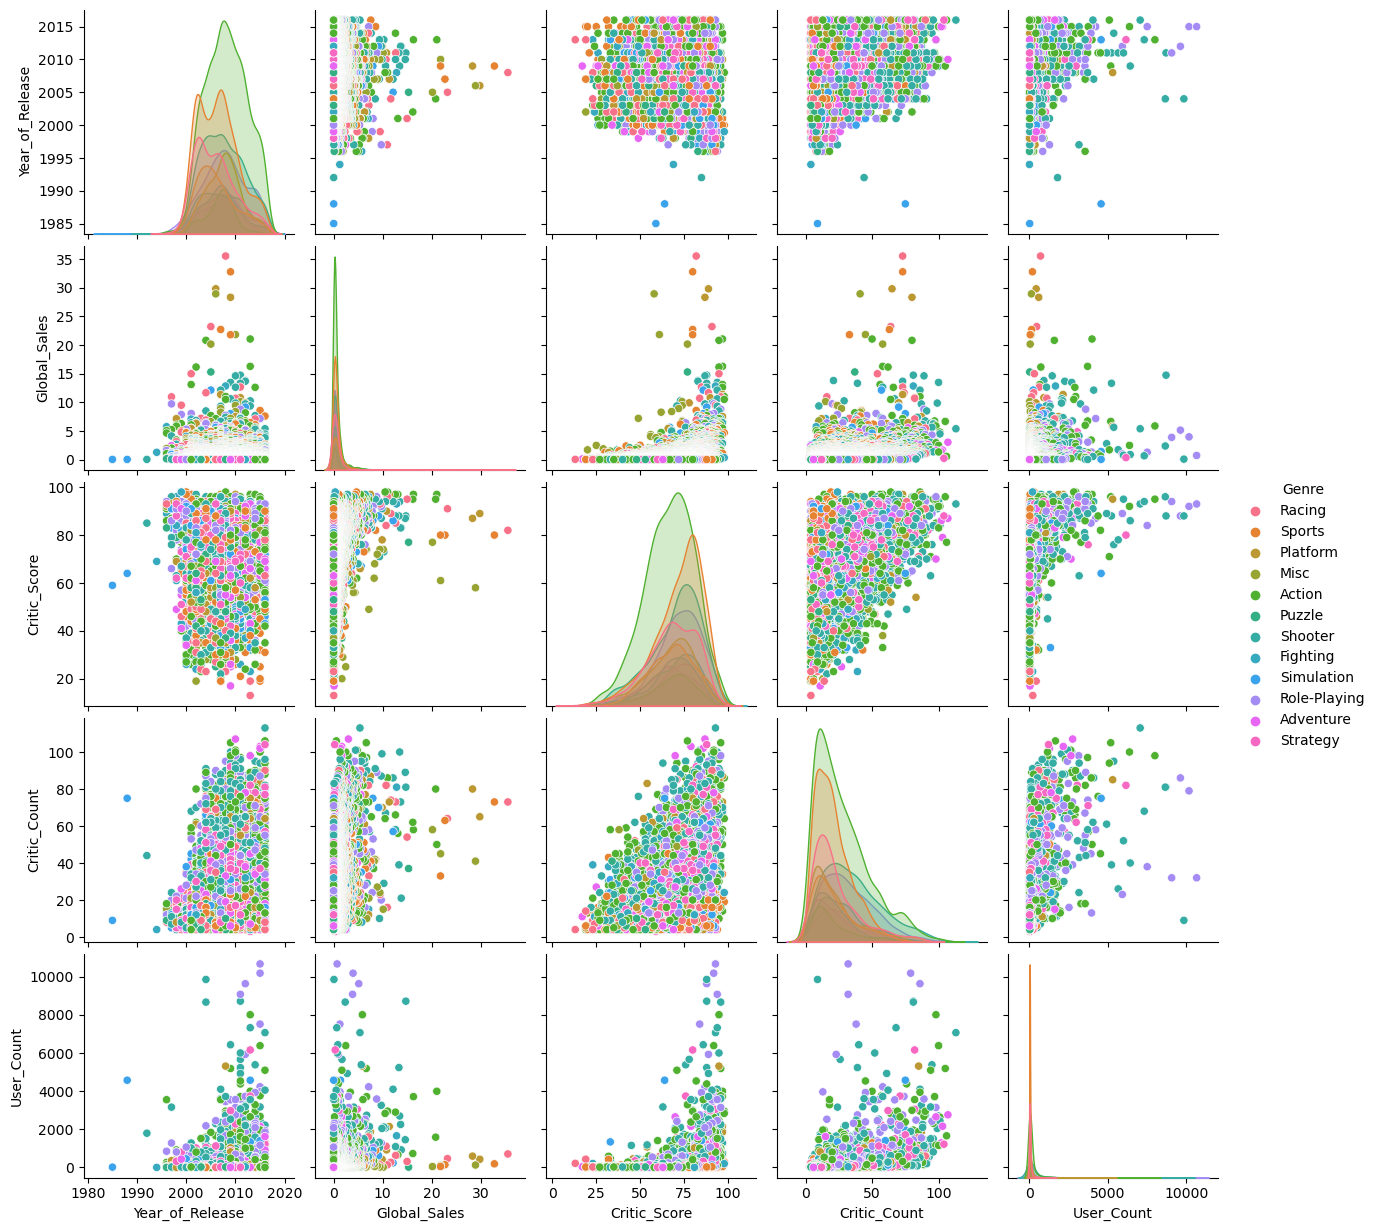

In [73]:
# Drop irrelevant columns
df = data.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

# Drop missing values
df = df.dropna()

# Plot scatter plot matrix
sns.pairplot(df, hue='Genre')

# Correlation Matrix

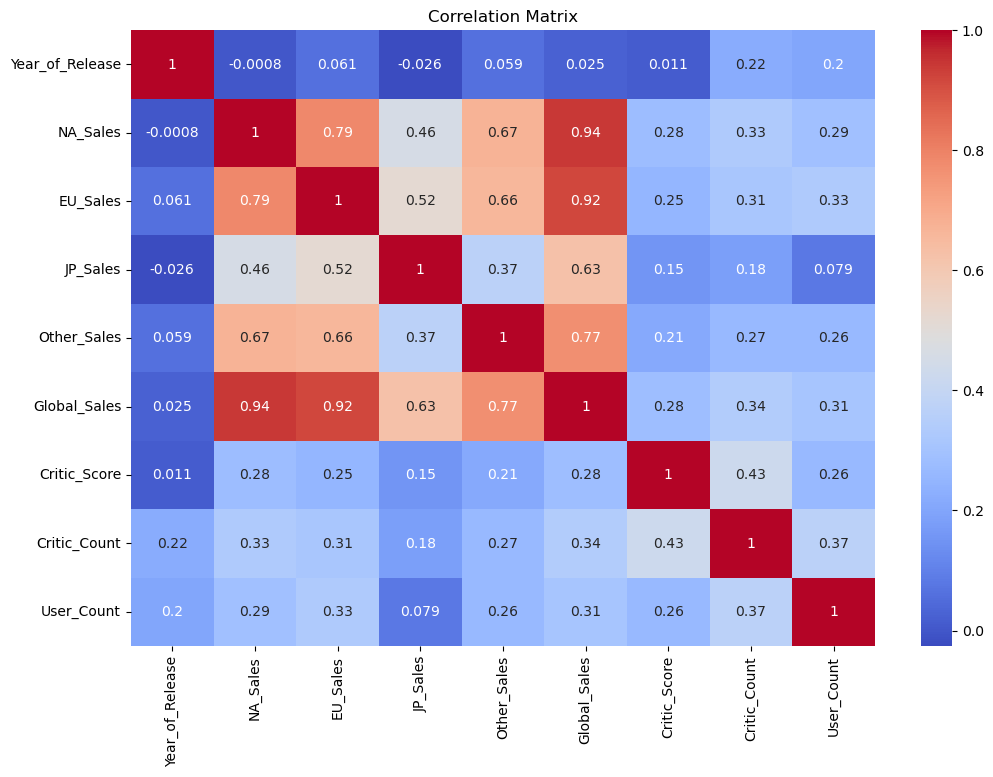

In [87]:
#Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Stacked bar chart

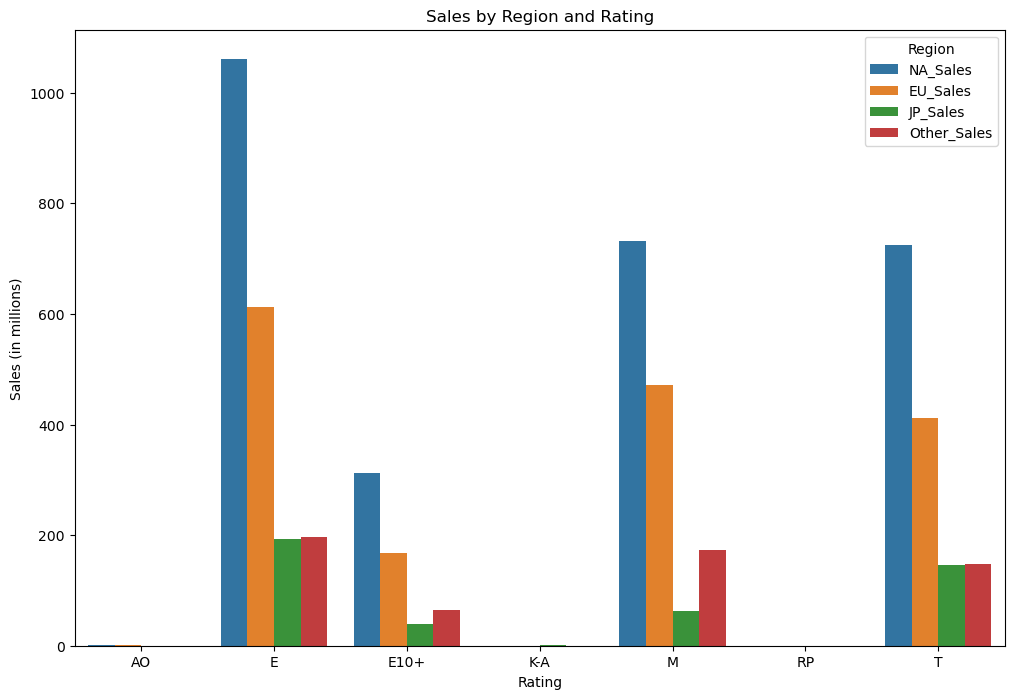

In [112]:
#Sales by Region and Rating
#Group by rating and region
grouped3 = data.groupby(['Rating'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt data to create stacked bar chart
melted = pd.melt(grouped3, id_vars='Rating', var_name='Region', value_name='Sales')

#Create stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Sales', hue='Region', data=melted)
plt.title('Sales by Region and Rating')
plt.xlabel('Rating')
plt.ylabel('Sales (in millions)')
plt.show()

# ASSIGNMENT OF DUMMY VARIABLES TO CATEGORICAL COLUMNS

In [15]:
#assignment of dummy variables
print(data.shape) #pre-dummies shape

data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape

data.head #Check to verify that dummies are ok

(8136, 16)
(8136, 49)


<bound method NDFrame.head of                             Name  Year_of_Release              Publisher  \
2                 Mario Kart Wii           2008.0               Nintendo   
3              Wii Sports Resort           2009.0               Nintendo   
6          New Super Mario Bros.           2006.0               Nintendo   
7                       Wii Play           2006.0               Nintendo   
8      New Super Mario Bros. Wii           2009.0               Nintendo   
...                          ...              ...                    ...   
16700                     Breach           2011.0              Destineer   
16701           Bust-A-Move 3000           2003.0                Ubisoft   
16702           Mega Brain Boost           2008.0  Majesco Entertainment   
16706    STORM: Frontline Nation           2011.0                Unknown   
16709                    15 Days           2009.0      DTP Entertainment   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_

In [16]:
#dropping the features that are discarded for the models
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [17]:
#setting the dependent variable(Y) and independent variables(X)
print(data.columns)

X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

#cross checking the shape of the dataset
print(X.shape)
print(Y.shape)

Index(['Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_3DS', 'Platform_DC',
       'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC',
       'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4',
       'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU',
       'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_AO',
       'Rating_E', 'Rating_E10+', 'Rating_K-A', 'Rating_M', 'Rating_RP',
       'Rating_T'],
      dtype='object')
(8136, 29)
(8136, 1)


Data splitting and Data training

In [18]:
#data splitting- training and testing data splits
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#checking the shape of the split data
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (6102, 29)
Y_train shape: (6102, 1)
X_test shape: (2034, 29)
Y_test shape: (2034, 1)


Data scaling and Data transformation

In [19]:
#dependent variable was no where normally distributed
#hence, we applied log transformation
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [20]:
#data normalization applied on independent variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Statistical Models For Regression

Preparing the grids for Grid Search CV as a part of the optimization technique

In [21]:
#Empty grid to define for linear regression
param_grid_lr = [
    {}
]

#Parameter grid for lasso
param_grid_lasso = [
    {'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'max_iter': [1000000, 100000, 10000, 1000]}
]

#Parameter grid for Ridge Regression
param_grid_rr = [
    {'alpha': [100, 10, 1, 0.1, 0.01, 0.001]}
]

#Parameter grid for Support Vector Regressor
param_grid_svr = [
    {'C': [0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']}
]

#Parameter grid for Random Forest
param_grid_rf = [
    {'n_estimators': [3, 10, 30, 50, 70], 'max_features': [2,4,6,8,10,12], 'max_depth': [2, 3, 5, 7, 9]}
]

#Parameter grid for Gradient Boosting Regressor
param_grid_gbr = [
    {'n_estimators': [200, 225, 250, 275], 'max_features': [6, 8, 10, 12], 'max_depth': [5, 7, 9]}
]

# LINEAR REGRESSION

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, scoring='neg_mean_squared_error', cv=5)
grid_search_lr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))

lr_best_cross_val_score = (np.sqrt(-grid_search_lr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(lr_best_cross_val_score)))

lr_score = np.sqrt(-grid_search_lr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(lr_score)))

Best parameters: {}
Best cross-validation score: 0.40
Test set score: 0.43


# LASSO REGRESSION

In [33]:
from sklearn.linear_model import Lasso

grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))

lasso_best_cross_val_score = (np.sqrt(-grid_search_lasso.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(lasso_best_cross_val_score)))

lasso_score = np.sqrt(-grid_search_lasso.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(lasso_score)))

Best parameters: {'alpha': 0.0001, 'max_iter': 1000000}
Best cross-validation score: 0.40
Test set score: 0.43


# RIDGE REGRESSION

In [34]:
from sklearn.linear_model import Ridge

grid_search_rr = GridSearchCV(Ridge(), param_grid_rr, scoring='neg_mean_squared_error', cv=5)
grid_search_rr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_rr.best_params_))

rr_best_cross_val_score = (np.sqrt(-grid_search_rr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(rr_best_cross_val_score)))

rr_score = np.sqrt(-grid_search_rr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(rr_score)))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.40
Test set score: 0.43


# K- NEAREST NEIGHBOUR

In [35]:
from sklearn.neighbors import KNeighborsRegressor

#Import r2 score and mse for Calculation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

kRange = range(5,50,5)

scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    regressor_knn.fit(X_train,Y_train)
    pred = regressor_knn.predict(X_test)
    
    scores_list.append(r2_score(Y_test,pred))
    
print(scores_list)

[0.2774048606835715, 0.29675431773412775, 0.29955567609936273, 0.300158822325738, 0.30710398039898756, 0.30629707209378343, 0.30766555184350786, 0.3062906325450926, 0.30158994552871277]


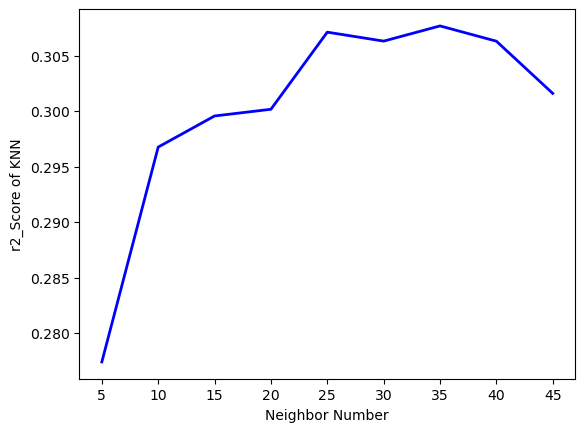

In [36]:
plt.plot(kRange, scores_list, linewidth=2, color='blue')
plt.xticks(kRange)

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()   

In [37]:
#Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors = 35)

regressor_knn.fit(X_train,Y_train)
pred = regressor_knn.predict(X_test)

r2_knn = r2_score(Y_test,pred)
print("R2 score:", r2_knn)

#Calculate the mean squared error
mse = mean_squared_error(Y_test, pred)
print("Mean squared error:", mse)

R2 score: 0.30766555184350786
Mean squared error: 0.13668497373652885


# SUPPORT VECTOR MACHINE

In [27]:
from sklearn.svm import SVR

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_svr.best_params_))

svr_best_cross_val_score = (np.sqrt(-grid_search_svr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(svr_best_cross_val_score)))

svr_score = np.sqrt(-grid_search_svr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(svr_score)))

Best parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best cross-validation score: 0.42
Test set score: 0.42


# RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestRegressor

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_rf.best_params_))

rf_best_cross_val_score = (np.sqrt(-grid_search_rf.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(rf_best_cross_val_score)))

rf_score = np.sqrt(-grid_search_rf.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(rf_score)))

Best parameters: {'max_depth': 9, 'max_features': 12, 'n_estimators': 50}
Best cross-validation score: 0.33
Test set score: 0.35


# K-MEANS 

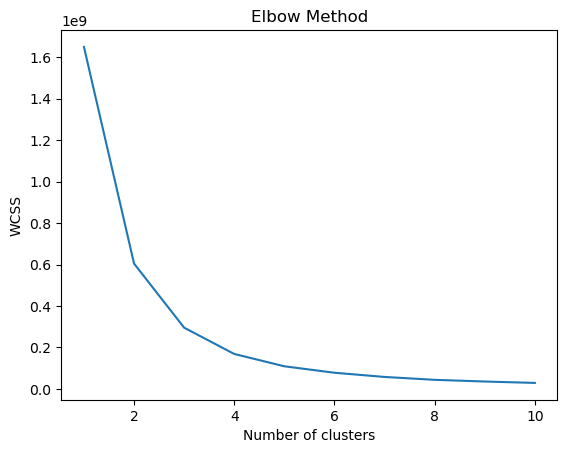

In [30]:
from sklearn.cluster import KMeans

#create a list to store WCSS values for different numbers of clusters
wcss = []

#loop over different numbers of clusters and calculate the WCSS for each one
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

#plot the WCSS values as a function of the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
import sklearn.metrics as metrics

#Fit K-means clustering model with optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_train)

#Print the number of data points in each cluster
print(pd.Series(y_kmeans).value_counts())

1    5694
0     321
3      72
2      15
dtype: int64


# BOOSTING

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, Y_train)

print("Best parameters: {}".format(grid_search_gbr.best_params_))
gbr_best_cross_val_score = (np.sqrt(-grid_search_gbr.best_score_))

print("Best cross-validation score: {:.2f}".format(np.expm1(gbr_best_cross_val_score)))
gbr_score = np.sqrt(-grid_search_gbr.score(X_test, Y_test))

print("Test set score: {:.2f}".format(np.expm1(gbr_score)))

Best parameters: {'max_depth': 5, 'max_features': 10, 'n_estimators': 200}
Best cross-validation score: 0.31
Test set score: 0.33


# VARIABLE IMPORTANCE

Since 'SVR' object has no attribute 'feature_importances_', we considered the second best model- Random Forest for plotting
relative variable importance

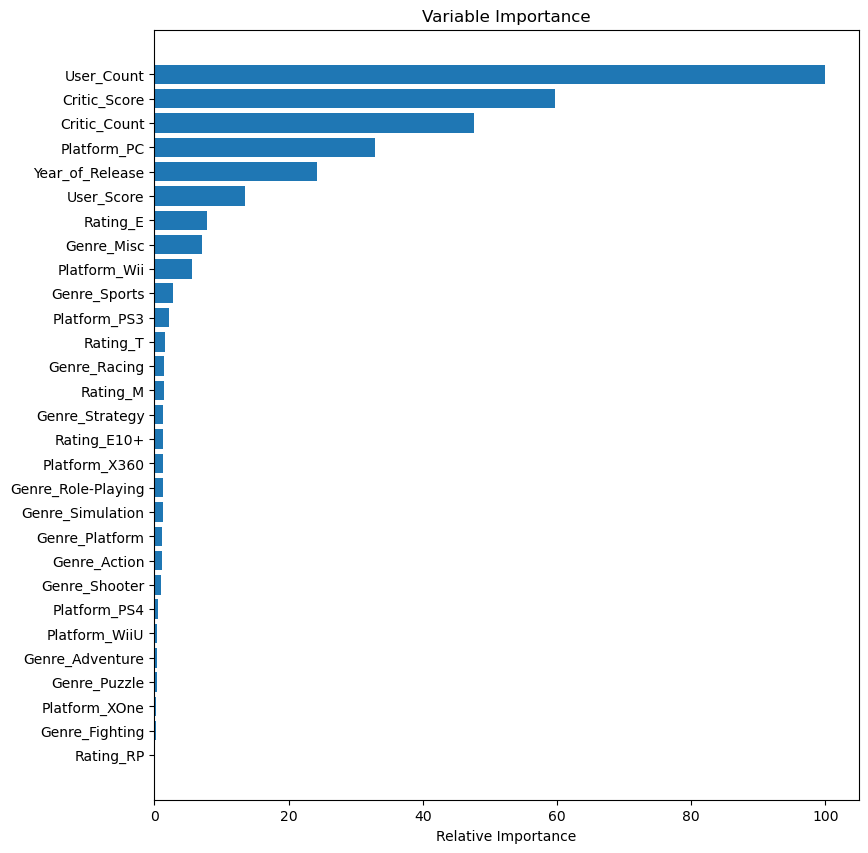

In [35]:
#Plot feature importance
feature_importance = grid_search_rf.best_estimator_.feature_importances_

#make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns.values[sorted_idx]) 
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Conclusion

# ACCURACY COMPARISON ANALYSIS

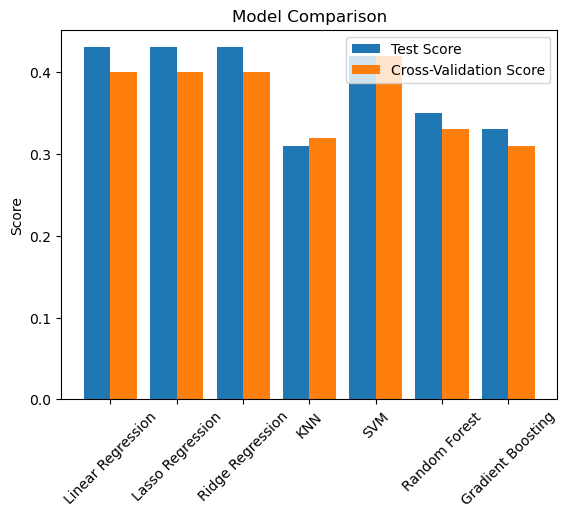

In [25]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'KNN', 'SVM', 'Random Forest', 'Gradient Boosting']
test_scores = [0.43, 0.43, 0.43, 0.31, 0.42, 0.35, 0.33]
cv_scores = [0.40, 0.40, 0.40, 0.32, 0.42, 0.33, 0.31]

x = range(len(models))

fig, ax = plt.subplots()
ax.bar(x, test_scores, width=0.4, label='Test Score')
ax.bar([i + 0.4 for i in x], cv_scores, width=0.4, label='Cross-Validation Score')

ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(models, rotation=45)

ax.legend()
plt.ylabel('Score')
plt.title('Model Comparison')
plt.show()

## Best model according to CV score and test score:

SUPPORT VECTOR REGRESSOR

![](https://i.imgur.com/GvvZSL0.gif)
<h2 style='text-align:center;font-family:Comic Sans MS;font-size:30px;background-color:gold;border:20px;color:white'>Thank you!<h2>